##### Work from Udacity's Intro to Tensorflow Course

# Forecasting with machine learning

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
keras = tf.keras

In [2]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
    
def trend(time, slope=0):
    return slope * time
  
  
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

  
def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)
  
  
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

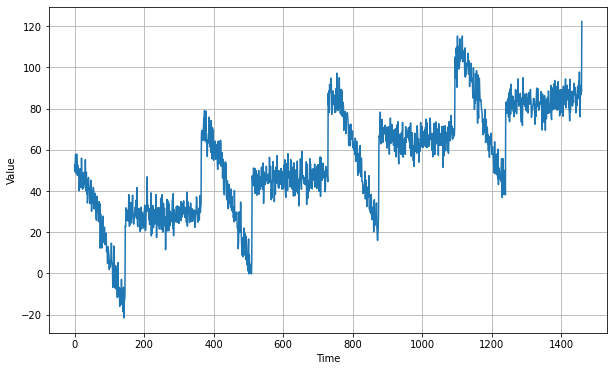

In [3]:
time = np.arange(4 * 365 + 1)

slope = 0.05
baseline = 10
amplitude = 40
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

noise_level = 5
noise = white_noise(time, noise_level, seed=42)

series += noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

## Forecasting with Machine Learning

create dataset of 30-step windows for training:

In [4]:
def window_dataset(series, window_size, batch_size=32,
                   shuffle_buffer=1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [5]:
split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

### Linear Model

In [6]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(1, input_shape=[window_size])
])
optimizer = keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
model.fit(train_set, epochs=100, validation_data=valid_set)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
31/31 [==============================] - 1s 22ms/step - loss: 46.5854 - mae: 47.9542 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 2/100
31/31 [==============================] - 0s 7ms/step - loss: 11.8285 - mae: 11.9459 - val_loss: 9.2357 - val_mae: 9.6871
Epoch 3/100
31/31 [==============================] - 0s 7ms/step - loss: 10.1682 - mae: 10.3806 - val_loss: 9.1530 - val_mae: 9.6008
Epoch 4/100
31/31 [==============================] - 0s 8ms/step - loss: 9.8548 - mae: 10.2880 - val_loss: 9.2402 - val_mae: 9.5627
Epoch 5/100
31/31 [==============================] - 0s 7ms/step - loss: 9.3782 - mae: 10.1772 - val_loss: 8.8791 - val_mae: 9.4029
Epoch 6/100
31/31 [==============================] - 0s 8ms/step - loss: 9.5393 - mae: 10.0866 - val_loss: 8.9816 - val_mae: 9.3764
Epoch 7/100
31/31 [==============================] - 0s 8ms/step - loss: 9.4518 - mae: 9.9598 - val_lo

31/31 [==============================] - 0s 7ms/step - loss: 7.1450 - mae: 7.6849 - val_loss: 6.7834 - val_mae: 7.3680
Epoch 35/100
31/31 [==============================] - 0s 7ms/step - loss: 7.0708 - mae: 7.5731 - val_loss: 7.0126 - val_mae: 7.5711
Epoch 36/100
31/31 [==============================] - 0s 7ms/step - loss: 6.9887 - mae: 7.5424 - val_loss: 6.6977 - val_mae: 7.2341
Epoch 37/100
31/31 [==============================] - 0s 8ms/step - loss: 7.1191 - mae: 7.4698 - val_loss: 6.7660 - val_mae: 7.2993
Epoch 38/100
31/31 [==============================] - 0s 7ms/step - loss: 6.7919 - mae: 7.3897 - val_loss: 6.6870 - val_mae: 7.1210
Epoch 39/100
31/31 [==============================] - 0s 7ms/step - loss: 6.7347 - mae: 7.3467 - val_loss: 6.7620 - val_mae: 7.2326
Epoch 40/100
31/31 [==============================] - 0s 8ms/step - loss: 6.5690 - mae: 7.2490 - val_loss: 6.9749 - val_mae: 7.5261
Epoch 41/100
31/31 [==============================] - 0s 8ms/step - loss: 6.7240 - mae: 7

31/31 [==============================] - 0s 7ms/step - loss: 5.0800 - mae: 5.5226 - val_loss: 5.3852 - val_mae: 5.8857
Epoch 97/100
31/31 [==============================] - 0s 7ms/step - loss: 4.9726 - mae: 5.5036 - val_loss: 5.1862 - val_mae: 5.7094
Epoch 98/100
31/31 [==============================] - 0s 7ms/step - loss: 5.1391 - mae: 5.4776 - val_loss: 5.2916 - val_mae: 5.8079
Epoch 99/100
31/31 [==============================] - 0s 8ms/step - loss: 5.1541 - mae: 5.4691 - val_loss: 5.1674 - val_mae: 5.6754
Epoch 100/100
31/31 [==============================] - 0s 7ms/step - loss: 4.9664 - mae: 5.4741 - val_loss: 5.3667 - val_mae: 5.8500


In [7]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(1, input_shape=[window_size])
])

lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10**(epoch / 30))
optimizer = keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 0s 11ms/step - loss: 67.5515 - mae: 68.2355
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 52.3298 - mae: 52.8279
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 34.9479 - mae: 35.3488
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 17.8159 - mae: 18.2666
Epoch 5/100
31/31 [==============================] - 0s 4ms/step - loss: 8.5909 - mae: 9.0412
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 8.0042 - mae: 8.4686
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 7.8518 - mae: 8.3976
Epoch 8/100
31/31 [==============================] - 0s 5ms/step - loss: 7.9012 - mae: 8.3568
Epoch 9/100
31/31 [==============================] - 0s 4ms/step - loss: 7.8216 - mae: 8.3132
Epoch 10/100
31/31 [==============================] - 0s 5ms/step - loss: 7.7424 - mae: 8.2520
Epoch 11/100
31/31 [==============================

31/31 [==============================] - 0s 4ms/step - loss: 4.8636 - mae: 5.3375
Epoch 65/100
31/31 [==============================] - 0s 5ms/step - loss: 5.5212 - mae: 5.9829
Epoch 66/100
31/31 [==============================] - 0s 5ms/step - loss: 4.9525 - mae: 5.4103
Epoch 67/100
31/31 [==============================] - 0s 4ms/step - loss: 5.1609 - mae: 5.6387
Epoch 68/100
31/31 [==============================] - 0s 5ms/step - loss: 6.2999 - mae: 6.7592
Epoch 69/100
31/31 [==============================] - 0s 5ms/step - loss: 5.6417 - mae: 6.1219
Epoch 70/100
31/31 [==============================] - 0s 5ms/step - loss: 6.7461 - mae: 7.2522
Epoch 71/100
31/31 [==============================] - 0s 4ms/step - loss: 6.5626 - mae: 7.0139
Epoch 72/100
31/31 [==============================] - 0s 4ms/step - loss: 9.4871 - mae: 10.0320
Epoch 73/100
31/31 [==============================] - 0s 4ms/step - loss: 7.7631 - mae: 8.2148
Epoch 74/100
31/31 [==============================] - 0s 4ms/s

(1e-06, 0.001, 0.0, 20.0)

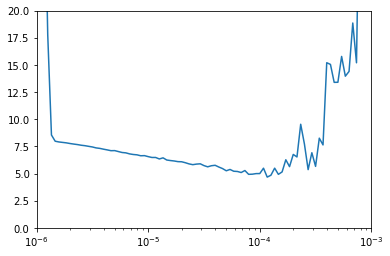

In [8]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-6, 1e-3, 0, 20])

In [9]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(1, input_shape=[window_size])
])
optimizer = keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/500
31/31 [==============================] - 0s 15ms/step - loss: 46.5854 - mae: 47.9542 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 2/500
31/31 [==============================] - 0s 7ms/step - loss: 11.8285 - mae: 11.9459 - val_loss: 9.2357 - val_mae: 9.6871
Epoch 3/500
31/31 [==============================] - 0s 8ms/step - loss: 10.1682 - mae: 10.3806 - val_loss: 9.1530 - val_mae: 9.6008
Epoch 4/500
31/31 [==============================] - 0s 7ms/step - loss: 9.8548 - mae: 10.2880 - val_loss: 9.2402 - val_mae: 9.5627
Epoch 5/500
31/31 [==============================] - 0s 7ms/step - loss: 9.3782 - mae: 10.1772 - val_loss: 8.8791 - val_mae: 9.4029
Epoch 6/500
31/31 [==============================] - 0s 8ms/step - loss: 9.5393 - mae: 10.0866 - val_loss: 8.9816 - val_mae: 9.3764
Epoch 7/500
31/31 [==============================] - 0s 8ms/step - loss: 9.4518 - mae: 9.9598 - val_loss: 9.1477 - val_mae: 9.6448
Epoch 8/500
31/31 [==============================] - 0s 9ms/step 

31/31 [==============================] - 0s 7ms/step - loss: 6.9887 - mae: 7.5424 - val_loss: 6.6977 - val_mae: 7.2341
Epoch 37/500
31/31 [==============================] - 0s 7ms/step - loss: 7.1191 - mae: 7.4698 - val_loss: 6.7660 - val_mae: 7.2993
Epoch 38/500
31/31 [==============================] - 0s 7ms/step - loss: 6.7919 - mae: 7.3897 - val_loss: 6.6870 - val_mae: 7.1210
Epoch 39/500
31/31 [==============================] - 0s 8ms/step - loss: 6.7347 - mae: 7.3467 - val_loss: 6.7620 - val_mae: 7.2326
Epoch 40/500
31/31 [==============================] - 0s 8ms/step - loss: 6.5690 - mae: 7.2490 - val_loss: 6.9749 - val_mae: 7.5261
Epoch 41/500
31/31 [==============================] - 0s 8ms/step - loss: 6.7240 - mae: 7.2129 - val_loss: 6.5955 - val_mae: 7.0717
Epoch 42/500
31/31 [==============================] - 0s 7ms/step - loss: 6.8793 - mae: 7.1823 - val_loss: 6.6620 - val_mae: 7.0698
Epoch 43/500
31/31 [==============================] - 0s 6ms/step - loss: 6.5443 - mae: 7

31/31 [==============================] - 0s 8ms/step - loss: 5.1391 - mae: 5.4776 - val_loss: 5.2916 - val_mae: 5.8079
Epoch 99/500
31/31 [==============================] - 0s 7ms/step - loss: 5.1541 - mae: 5.4691 - val_loss: 5.1674 - val_mae: 5.6754
Epoch 100/500
31/31 [==============================] - 0s 7ms/step - loss: 4.9664 - mae: 5.4741 - val_loss: 5.3667 - val_mae: 5.8500
Epoch 101/500
31/31 [==============================] - 0s 8ms/step - loss: 4.8493 - mae: 5.4899 - val_loss: 5.6709 - val_mae: 6.2145
Epoch 102/500
31/31 [==============================] - 0s 7ms/step - loss: 4.9781 - mae: 5.4140 - val_loss: 5.2001 - val_mae: 5.7089
Epoch 103/500
31/31 [==============================] - 0s 7ms/step - loss: 5.0260 - mae: 5.4920 - val_loss: 5.0598 - val_mae: 5.6270
Epoch 104/500
31/31 [==============================] - 0s 8ms/step - loss: 4.8705 - mae: 5.4058 - val_loss: 5.0751 - val_mae: 5.6113
Epoch 105/500
31/31 [==============================] - 0s 8ms/step - loss: 4.7771 - 

In [10]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [11]:
lin_forecast = model_forecast(model, series[split_time - window_size:-1], window_size)[:, 0]

In [12]:
lin_forecast.shape

(461,)

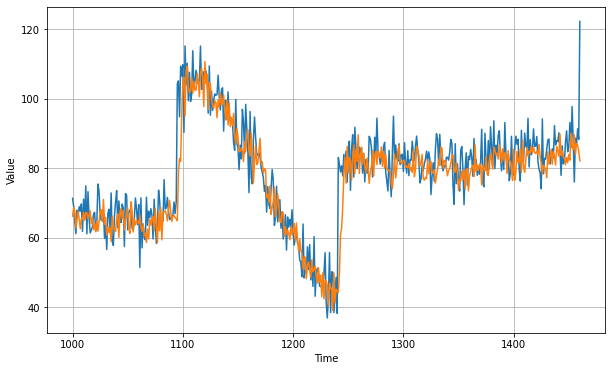

In [13]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, lin_forecast)

In [14]:
keras.metrics.mean_absolute_error(x_valid, lin_forecast).numpy()

5.3433857

### Dense Model Forecasting

In [15]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1)
])

lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 20))
optimizer = keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
31/31 [==============================] - 0s 14ms/step - loss: 43.7540 - mae: 44.3312
Epoch 2/100
31/31 [==============================] - 0s 6ms/step - loss: 41.3574 - mae: 42.0073
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 38.5907 - mae: 39.1402
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 35.2973 - mae: 35.8227
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 31.6483 - mae: 32.0831
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 27.4519 - mae: 27.9021
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 22.8110 - mae: 23.2716
Epoch 8/100
31/31 [==============================] - 0s 5ms/step - loss: 17.8342 - mae: 18.2723
Epoch 9/100
31/31 [==============================] - 0s 6ms/step - loss: 12.6879 - mae: 13.1545
Epoch 10/100
31/31 [==============================] - 0s 5ms/step - loss: 8.5515 - mae: 9.0650
Epoch 11/100
31/31 [====================

31/31 [==============================] - 0s 6ms/step - loss: 5.1978 - mae: 5.6637
Epoch 65/100
31/31 [==============================] - 0s 5ms/step - loss: 4.9184 - mae: 5.4029
Epoch 66/100
31/31 [==============================] - 0s 6ms/step - loss: 5.0521 - mae: 5.5310
Epoch 67/100
31/31 [==============================] - 0s 4ms/step - loss: 5.0938 - mae: 5.5837
Epoch 68/100
31/31 [==============================] - 0s 4ms/step - loss: 5.0266 - mae: 5.5025
Epoch 69/100
31/31 [==============================] - 0s 6ms/step - loss: 5.2117 - mae: 5.6966
Epoch 70/100
31/31 [==============================] - 0s 5ms/step - loss: 5.4814 - mae: 5.9497
Epoch 71/100
31/31 [==============================] - 0s 5ms/step - loss: 5.2010 - mae: 5.6829
Epoch 72/100
31/31 [==============================] - 0s 5ms/step - loss: 6.1502 - mae: 6.6517
Epoch 73/100
31/31 [==============================] - 0s 5ms/step - loss: 6.4134 - mae: 6.8970
Epoch 74/100
31/31 [==============================] - 0s 5ms/st

(1e-07, 0.005, 0.0, 30.0)

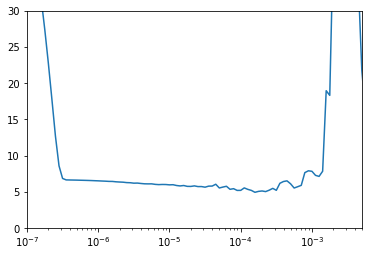

In [16]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-7, 5e-3, 0, 30])

In [17]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1)
])

optimizer = keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/500
31/31 [==============================] - 1s 18ms/step - loss: 20.0238 - mae: 20.8270 - val_loss: 0.0000e+00 - val_mae: 0.0000e+00
Epoch 2/500
31/31 [==============================] - 0s 8ms/step - loss: 8.6303 - mae: 9.0442 - val_loss: 7.8260 - val_mae: 8.3112
Epoch 3/500
31/31 [==============================] - 0s 8ms/step - loss: 8.1637 - mae: 8.4718 - val_loss: 7.6869 - val_mae: 8.1423
Epoch 4/500
31/31 [==============================] - 0s 7ms/step - loss: 7.8828 - mae: 8.1519 - val_loss: 7.1338 - val_mae: 7.4683
Epoch 5/500
31/31 [==============================] - 0s 7ms/step - loss: 7.3930 - mae: 7.8994 - val_loss: 6.8095 - val_mae: 7.3306
Epoch 6/500
31/31 [==============================] - 0s 8ms/step - loss: 7.2310 - mae: 7.6983 - val_loss: 6.6906 - val_mae: 7.0048
Epoch 7/500
31/31 [==============================] - 0s 7ms/step - loss: 6.9234 - mae: 7.5004 - val_loss: 6.5143 - val_mae: 7.0573
Epoch 8/500
31/31 [==============================] - 0s 8ms/step - loss:

Epoch 37/500
31/31 [==============================] - 0s 7ms/step - loss: 5.5528 - mae: 6.0751 - val_loss: 5.3721 - val_mae: 5.8903
Epoch 38/500
31/31 [==============================] - 0s 8ms/step - loss: 5.5140 - mae: 6.0793 - val_loss: 5.4918 - val_mae: 5.9636
Epoch 39/500
31/31 [==============================] - 0s 8ms/step - loss: 5.5591 - mae: 6.0607 - val_loss: 5.7866 - val_mae: 6.2465
Epoch 40/500
31/31 [==============================] - 0s 8ms/step - loss: 5.5369 - mae: 5.9988 - val_loss: 6.0022 - val_mae: 6.5557
Epoch 41/500
31/31 [==============================] - 0s 8ms/step - loss: 5.5638 - mae: 6.0155 - val_loss: 5.3899 - val_mae: 5.8099
Epoch 42/500
31/31 [==============================] - 0s 7ms/step - loss: 5.6978 - mae: 5.9916 - val_loss: 5.3427 - val_mae: 5.7782
Epoch 43/500
31/31 [==============================] - 0s 7ms/step - loss: 5.5059 - mae: 5.9490 - val_loss: 5.3604 - val_mae: 5.7902
Epoch 44/500
31/31 [==============================] - 0s 7ms/step - loss: 5.

In [18]:
dense_forecast = model_forecast(
    model,
    series[split_time - window_size:-1],
    window_size)[:, 0]

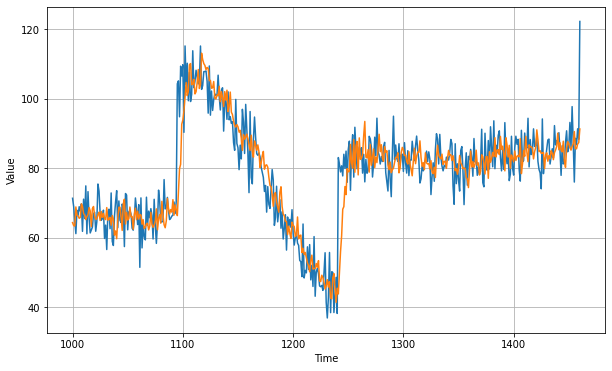

In [19]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, dense_forecast)

In [20]:
keras.metrics.mean_absolute_error(x_valid, dense_forecast).numpy()

5.299474